## Design and implement a fully connected deep neural network with at least 2 hidden layers for Minst classification. Use appropriate Learning Algorithm, output function and loss function.

In [ ]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path="mnist.npz")

In [ ]:
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
X_train = train_images
Y_train = train_labels

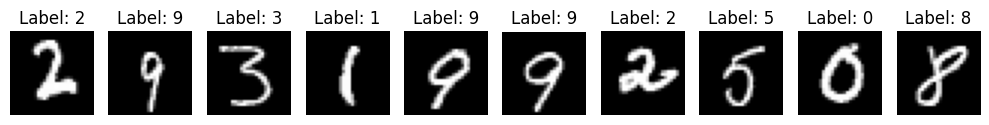

In [ ]:
num_samples = 10
random_indices = np.random.choice(X_train.shape[0], num_samples)
sample_images = X_train[random_indices].reshape(num_samples, 28, 28)

sample_labels = Y_train[random_indices]

fig, axes = plt.subplots(1, num_samples, figsize=(10, 3))

for i in range(num_samples):
    axes[i].imshow(sample_images[i], cmap='gray')
    axes[i].set_title(f"Label: {sample_labels[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model_relu = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_relu.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_relu.fit(X_train, Y_train, epochs=10)
test_loss, test_acc = model_relu.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8243 - loss: 8.0933
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9094 - loss: 0.3889
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9282 - loss: 0.2781
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9339 - loss: 0.2483
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9409 - loss: 0.2299
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9440 - loss: 0.2184
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.9514 - loss: 0.1887
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9517 - loss: 0.1853
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9518 - loss: 0.1923
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9541 - loss: 0.1808
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9415 - loss: 0.3046
Test accuracy: 0.949400007724762


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.97      0.92      0.95      1032
           3       0.91      0.96      0.93      1010
           4       0.94      0.94      0.94       982
           5       0.96      0.93      0.95       892
           6       0.96      0.96      0.96       958
           7       0.97      0.94      0.96      1028
           8       0.90      0.93      0.92       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



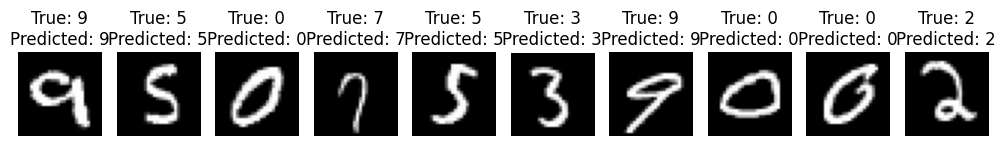

In [ ]:
predictions = model_relu.predict(test_images)

predicted_classes = np.argmax(predictions, axis=1)

# Print a classification report
from sklearn.metrics import classification_report
print(classification_report(test_labels, predicted_classes))

# Visualize some predictions
num_samples = 10
random_indices = np.random.choice(test_images.shape[0], num_samples)
sample_images = test_images[random_indices].reshape(num_samples, 28, 28)
sample_labels = test_labels[random_indices]
predicted_labels = predicted_classes[random_indices]

fig, axes = plt.subplots(1, num_samples, figsize=(10, 3))
for i in range(num_samples):
    axes[i].imshow(sample_images[i], cmap='gray')
    axes[i].set_title(f"True: {sample_labels[i]}\nPredicted: {predicted_labels[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

**Conclusion:** This experiment involved designing a fully connected deep neural network (DNN) to classify handwritten digits from the MNIST dataset. The model included two hidden layers with ReLU activation and a final softmax output layer, compiled with categorical crossentropy loss and the Adam optimizer. The results demonstrate the effectiveness of deep neural networks in achieving high accuracy for image classification tasks.